In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%run GRIPSVisualizationFunctions_v1.ipynb

In [3]:
# ****************************************************************************************************************

In [4]:
#DFBarcode = pd.read_csv('FWD_REV_REDI_75585_startposChange.csv').drop('Unnamed: 0',1)
DFBarcode = pd.read_csv('FWD_REV_REDI_75585.csv').drop('Unnamed: 0',1)



In [5]:
DFBarcode.shape

(75585, 29)

In [6]:
DFBarcode['AS_FWD'].value_counts()
DFBarcode['AS_REV'].value_counts()

-6     51662
 0     23922
-18        1
Name: AS_REV, dtype: int64

In [7]:
DFBarcode[DFBarcode['read_id']==31667]

,headers_FWD,read_id,startpos_FWD,seq_FWD,alignment_score_FWD,numMismatches_FWD,MDTag_FWD,strand_FWD,AS_FWD,headers_REV,...,headers_REDI,startpos_REDI,seq_REDI,alignment_score_REDI,AS_REDI,barcodeNum_REDI,entireRead,REV_startpos_actual,REDI_startpos_actual,REDI_endpos_actual
2,1,31667,40,AGGTCA,AS:i:0,NM:i:0,MD:Z:6,+,0,1,...,551,293,GGAAGAATCAGGAAGTACCGATATCA,AS:i:-7,-7,552,TTCCGGTATTGCTTCGTTCGGTTACGTATTGCTAGGTCAAGGTCAG...,6753,6718,6744


In [8]:
#DFBarcode[DFBarcode['read_id']==10].transpose()

In [9]:
DFBarcodeDataset = structureDataFile(DFBarcode)
DFBarcodeDataset.columns


Index(['headers_FWD', 'read_id', 'startpos_FWD', 'seq_FWD',
       'alignment_score_FWD', 'numMismatches_FWD', 'MDTag_FWD', 'strand_FWD',
       'AS_FWD', 'headers_REV', 'startpos_REV', 'seq_REV',
       'alignment_score_REV', 'numMismatches_REV', 'MDTag_REV', 'strand_REV',
       'AS_REV', 'plate_seq', 'Plate', 'headers_REDI', 'startpos_REDI',
       'seq_REDI', 'alignment_score_REDI', 'AS_REDI', 'barcodeNum_REDI',
       'entireRead', 'REV_startpos_actual', 'REDI_startpos_actual',
       'REDI_endpos_actual', 'Row', 'Column'],
      dtype='object')

In [10]:
DFBarcodeDataset = structureDataFile(DFBarcode)
DFBarcodeDataset.columns

Index(['headers_FWD', 'read_id', 'startpos_FWD', 'seq_FWD',
       'alignment_score_FWD', 'numMismatches_FWD', 'MDTag_FWD', 'strand_FWD',
       'AS_FWD', 'headers_REV', 'startpos_REV', 'seq_REV',
       'alignment_score_REV', 'numMismatches_REV', 'MDTag_REV', 'strand_REV',
       'AS_REV', 'plate_seq', 'Plate', 'headers_REDI', 'startpos_REDI',
       'seq_REDI', 'alignment_score_REDI', 'AS_REDI', 'barcodeNum_REDI',
       'entireRead', 'REV_startpos_actual', 'REDI_startpos_actual',
       'REDI_endpos_actual', 'Row', 'Column'],
      dtype='object')

In [11]:
DFBarcodeDataset.to_csv('FinalBarcodeDataset.csv',index=False)

In [12]:
selectColumns = ['AS_FWD','AS_REV','AS_REDI','read_id','Plate','headers_REDI','barcodeNum_REDI','Row','Column','strand_FWD','strand_REV','startpos_FWD']
#selectColumnsReet = ['AS_FWD','AS_REV','AS_REDI','Plate','headers_REDI','Row','Column']

In [13]:
DFBarcodeDataset = DFBarcodeDataset[selectColumns]
DFBarcodeDataset = DFBarcodeDataset.drop_duplicates()


In [14]:
DFBarcodeDataset.head()

,AS_FWD,AS_REV,AS_REDI,read_id,Plate,headers_REDI,barcodeNum_REDI,Row,Column,strand_FWD,strand_REV,startpos_FWD
0,0,0,-5,48725,Alanine -5,431,432,9,48,+,-,37
1,0,-6,-7,36345,Alanine -10,879,880,19,16,+,+,32
2,0,-6,-7,31667,Alanine -6,551,552,12,24,+,-,40
3,0,-6,-5,72388,Alanine -6,1312,1313,28,17,+,-,32
4,0,0,-7,55165,Alanine -6,853,854,18,38,+,-,38


In [15]:
FWDStartposList = DFBarcodeDataset['startpos_FWD'].tolist()
FWDStartposList.sort()
min(FWDStartposList), max(FWDStartposList)

(1, 95)

#  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

# Optimal Alignment score - True Positive & False Positive evaluation

In [16]:
CPPlate4 = pd.read_csv('ColonyPositionPlate4.csv')
#CPPlate4 = pd.read_csv('ColonyPositionPlate1.csv')

In [17]:
DFBarcodeDataset['Plate'].value_counts()

Alanine -12    11202
Alanine -8      9714
Alanine -4      8981
Alanine -11     8080
Alanine -7      6528
Alanine -3      5981
Alanine -10     5699
Alanine -9      4383
Alanine -5      4302
Alanine -6      3956
Alanine -1      3925
Alanine -2      2834
Name: Plate, dtype: int64

In [18]:
DFBarcodeDataset_Plate4 = DFBarcodeDataset[DFBarcodeDataset['Plate']=='Alanine -4'].reset_index(drop=True)
#DFBarcodeDataset_Plate4 = DFBarcodeDataset[DFBarcodeDataset['Plate']=='Alanine -1'].reset_index(drop=True)

In [19]:
DFBarcodeDataset_Plate4Final = evaluateColony(DFBarcodeDataset_Plate4,'Row','Column',CPPlate4)

C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [20]:
DFBarcodeDataset_Plate4Final.shape

(8981, 13)

In [21]:
DFBarcodeDataset_Plate4Final.head()

,AS_FWD,AS_REV,AS_REDI,read_id,Plate,headers_REDI,barcodeNum_REDI,Row,Column,strand_FWD,strand_REV,startpos_FWD,Positions
0,0,0,-8,87405,Alanine -4,1276,1277,27,29,+,-,34,0
1,0,0,-5,36943,Alanine -4,32,33,1,33,+,-,44,1
2,0,-6,-8,69995,Alanine -4,696,697,15,25,-,-,61,0
3,0,0,-5,23101,Alanine -4,470,471,10,39,+,-,39,1
4,0,0,-4,72942,Alanine -4,43,44,1,44,+,-,52,1


In [22]:
DFBarcodeDataset_Plate4Final.to_csv('DFBarcodeDataset_Plate4Final.csv',index=False)

In [23]:
DFPlate4Matrics = DFBarcodeDataset_Plate4Final[['AS_FWD','AS_REV','AS_REDI','Plate','headers_REDI','barcodeNum_REDI','Row','Column','Positions']].drop_duplicates()
DFPlate4Matrics.shape

(3557, 9)

In [24]:
DFPlate4MatricsPlot = metricsSummary(DFPlate4Matrics)
DFPlate4MatricsPlot.head()

,Plate,AS_FWD,AS_REV,AS_REDI,Total,TruePositive,FalsePositive,Accuracy,AS_Combinations
0,Alanine -4,0,0,0,99,92,7,0.93,0:0:0
1,Alanine -4,0,0,-1,80,71,9,0.89,0:0:-1
2,Alanine -4,0,0,-2,65,58,7,0.89,0:0:-2
3,Alanine -4,0,0,-3,96,88,8,0.92,0:0:-3
4,Alanine -4,0,0,-4,105,91,14,0.87,0:0:-4


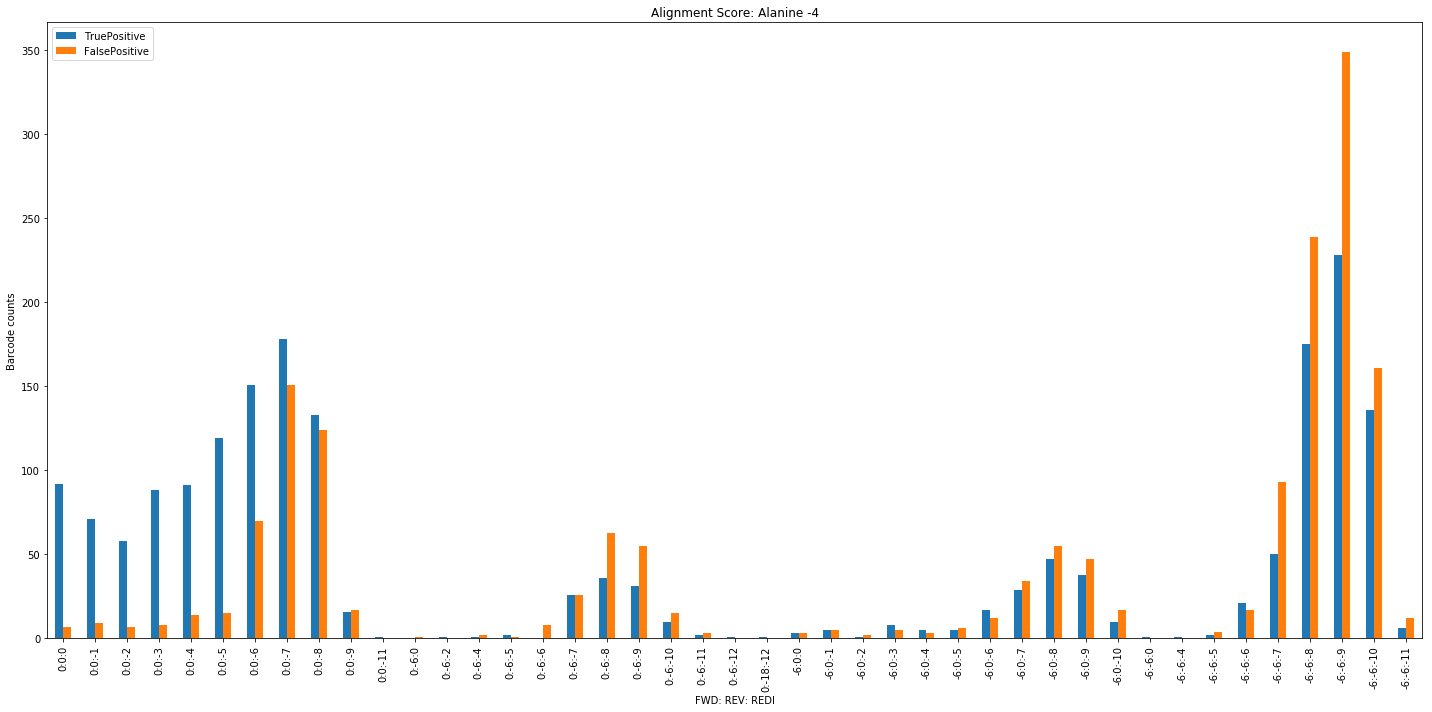

In [25]:
PlotPlateMatrics(DFPlate4MatricsPlot,'Alanine -4')

# TP / FW based on forward barcode start position

In [26]:
TP = DFBarcodeDataset_Plate4Final[DFBarcodeDataset_Plate4Final['Positions']==1]
FP = DFBarcodeDataset_Plate4Final[DFBarcodeDataset_Plate4Final['Positions']==0]

FWDStartposListTP = TP['startpos_FWD'].tolist()
FWDStartposListTP.sort()

FWDStartposListFP = FP['startpos_FWD'].tolist()
FWDStartposListFP.sort()

min(FWDStartposListTP), max(FWDStartposListTP),min(FWDStartposListFP), max(FWDStartposListFP)
len(FWDStartposListTP),len(FWDStartposListFP)

(4391, 4590)

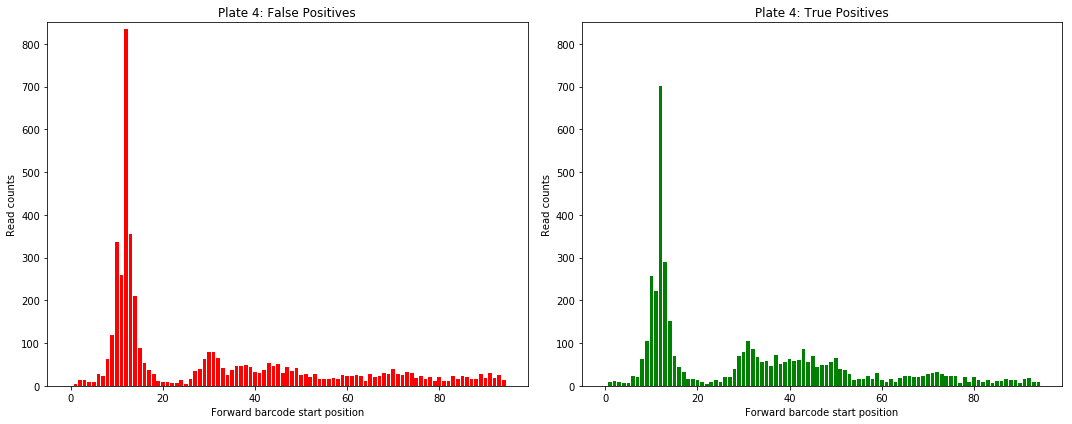

In [27]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import matplotlib.colors as mcolors

fig= plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121) 
h1 = createHist(FWDStartposListFP, min(FWDStartposListFP), max(FWDStartposListFP))

ax1.bar(range(0,len(h1)),h1,color='red')
ax1.set(xlabel='Forward barcode start position',ylabel='Read counts',title='Plate 4: False Positives',ylim=(0,850))

ax2 = fig.add_subplot(122) 
h2 = createHist(FWDStartposListTP, min(FWDStartposListTP), max(FWDStartposListTP))

ax2.bar(range(0,len(h2)),h2,color='green')
ax2.set(xlabel='Forward barcode start position',ylabel='Read counts',title='Plate 4: True Positives',ylim=(0,850))

plt.tight_layout()
fig.savefig('Plate 4 forwardBCPosition', dpi=fig.dpi)
plt.show()

In [28]:
# clearly no significance of forward barcode start position based on above plot

## Best Alignment scores: FWD:0 | REV:0 | REDI: (0,-1,-2,-3,-4,-5)

# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Use these alignment score for all plates

In [29]:
DFBarcodeDataset.shape

(75585, 12)

In [30]:
Best_AS_FWD = [0]
Best_AS_REV = [0]
Best_AS_REDI = [0,-1,-2,-3,-4,-5]
#Best_AS_REDI = [0,-1,-2,-3]

DFBarcodeDataset_bestmatch = bestMatchedAS(DFBarcodeDataset,Best_AS_FWD,Best_AS_REV,Best_AS_REDI)
DFBarcodeDataset_bestmatch.shape

(6316, 12)

In [31]:
DFBarcodeDataset_bestmatch.head()

,AS_FWD,AS_REV,AS_REDI,read_id,Plate,headers_REDI,barcodeNum_REDI,Row,Column,strand_FWD,strand_REV,startpos_FWD
0,0,0,-5,48725,Alanine -5,431,432,9,48,+,-,37
1,0,0,-4,42420,Alanine -10,674,675,15,3,+,-,45
2,0,0,-3,72603,Alanine -2,934,935,20,23,+,-,46
3,0,0,-5,67901,Alanine -2,1186,1187,25,35,+,-,35
4,0,0,-4,84385,Alanine -6,164,165,4,21,+,-,32


In [32]:
#DFBarcodeDataset_bestmatch[['Plate','AS_FWD','AS_REV','AS_REDI']].drop_duplicates().sort_values('Plate')

In [33]:
#DFBarcodeDataset_bestmatch['Plate'].value_counts()

In [34]:
DFGenes = pd.read_csv('FWD_REV_REDI_GENES_18280.csv').drop('Unnamed: 0',1)

In [35]:
DFGenes.shape, DFBarcodeDataset_bestmatch.shape

((18280, 34), (6316, 12))

In [36]:
DFGenes['Plate'].value_counts()
DFGenes.shape

(18280, 34)

In [37]:
GeneDF = pd.DataFrame(DFGenes['headers_GENES'].unique())
GeneDF['index1'] = GeneDF.index + 1

GeneDF.rename(columns={0:'headers_GENES'},inplace=True)
GeneDF['GeneName'] = 'Gene'+ GeneDF['index1'].astype(str)

GeneDF.head()

,headers_GENES,index1,GeneName
0,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,1,Gene1
1,KU42_F2144A_synonymous_codon_variant_TTC2144GC...,2,Gene2
2,KU42_Y759A_synonymous_codon_variant_TAT759GCT_...,3,Gene3
3,KU42_P642A_synonymous_codon_variant_CCT642GCT_...,4,Gene4
4,KU42_T666A_synonymous_codon_variant_ACC666GCT_...,5,Gene5


In [38]:
FinalDFGenes = pd.merge(DFGenes,GeneDF[['headers_GENES','GeneName']],on='headers_GENES', how='inner')

In [39]:
#BCPlatereadList = DFBarcodeDataset_bestmatch['read_id'].unique().tolist() # get list of barcode read id
    #print(BCPlatereadList[0])    
#GeneBCMatchedPlate = GenePlateDataset[GenePlateDataset['read_id'].isin(BCPlatereadList)] # Gene aligned to above barcodes()

In [40]:
selectColumns = ['AS_FWD','AS_REV','AS_REDI','AS','read_id','Plate','headers_REDI','barcodeNum_REDI','headers_GENES','GeneName','strand_REV','strand_FWD','strand']
FinalDFGenes = FinalDFGenes[selectColumns]

In [41]:
FinalDFGenesDataset = structureDataFile(FinalDFGenes)
FinalDFGenesDataset.to_csv('FinalDFGenesDataset.csv',index=False)
FinalDFGenesDataset.head()

,AS_FWD,AS_REV,AS_REDI,AS,read_id,Plate,headers_REDI,barcodeNum_REDI,headers_GENES,GeneName,strand_REV,strand_FWD,strand,Row,Column
0,0,-6,-7,0,36345,Alanine -10,879,880,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,Gene1,+,+,+,19,16
1,0,-6,-6,0,63361,Alanine -6,1014,1015,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,Gene1,+,+,+,22,7
2,0,-6,-7,0,3936,Alanine -6,968,969,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,Gene1,-,+,+,21,9
3,0,0,-7,0,20755,Alanine -10,842,843,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,Gene1,-,+,+,18,27
4,0,0,-6,0,12446,Alanine -10,842,843,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,Gene1,-,+,+,18,27


In [42]:
BCPlateReadList_bestmatch = DFBarcodeDataset_bestmatch['read_id'].unique().tolist() # get list of barcode read id
#print(BCPlatereadList[0])    
DFGenes_bestmatch = FinalDFGenesDataset[FinalDFGenesDataset['read_id'].isin(BCPlateReadList_bestmatch)].reset_index(drop=True) # Gene aligned to above barcodes()

In [43]:
DFGenes_bestmatch['Plate'].value_counts()

Alanine -10    198
Alanine -3     179
Alanine -12    165
Alanine -4     162
Alanine -11    131
Alanine -2     129
Alanine -6      78
Alanine -7      63
Alanine -8      61
Alanine -9      60
Alanine -1      45
Alanine -5      29
Name: Plate, dtype: int64

# <<<<<<<<<<<<<<<   Heat Map: All Plates >>>>>>>>>>>>>>>>>

In [44]:
PlateList = ['Alanine -1','Alanine -2','Alanine -3','Alanine -4','Alanine -5','Alanine -6','Alanine -7','Alanine -8','Alanine -9',
            'Alanine -10','Alanine -11','Alanine -12']
PlateList[11]

'Alanine -12'

In [45]:
PlateList.index('Alanine -12')

11

In [46]:
#Plate4_FP = DFBarcode_plate4_bestmatch[DFBarcode_plate4_bestmatch['Positions'] ==0]
#Plate4_TP = DFBarcode_plate4_bestmatch[DFBarcode_plate4_bestmatch['Positions'] > 0]

RankGeneFinal_cutoff1Alanine -1.csv


C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Users\ajamishr\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


Alanine -1


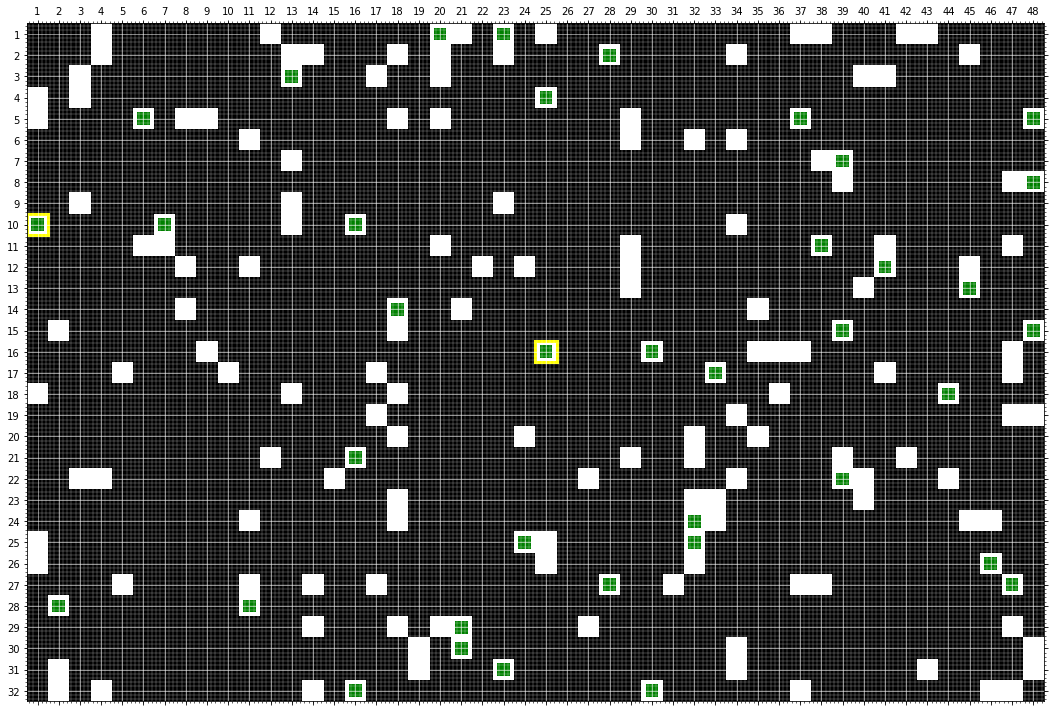

RankGeneFinal_cutoff1Alanine -2.csv
Alanine -2


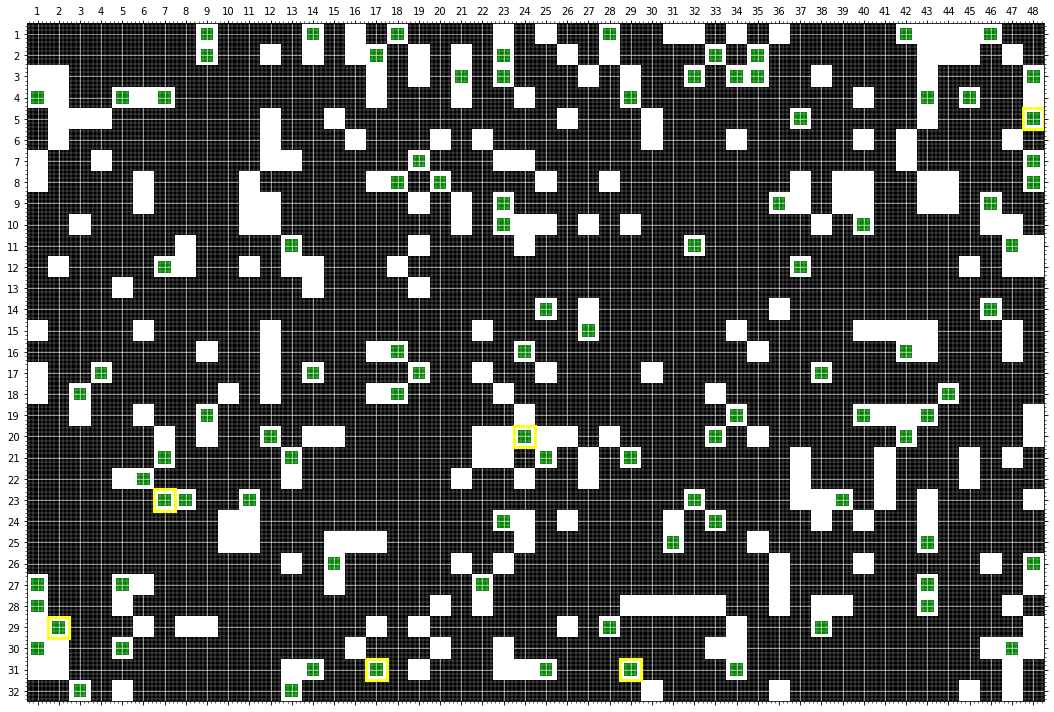

RankGeneFinal_cutoff1Alanine -3.csv
Alanine -3


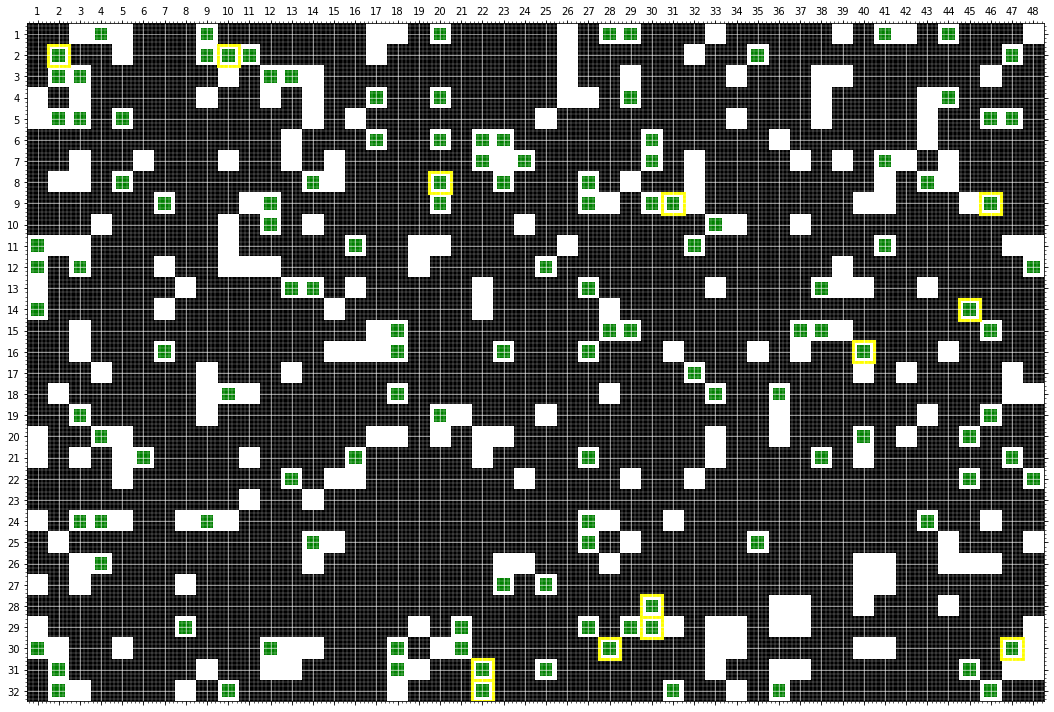

RankGeneFinal_cutoff1Alanine -4.csv
Alanine -4


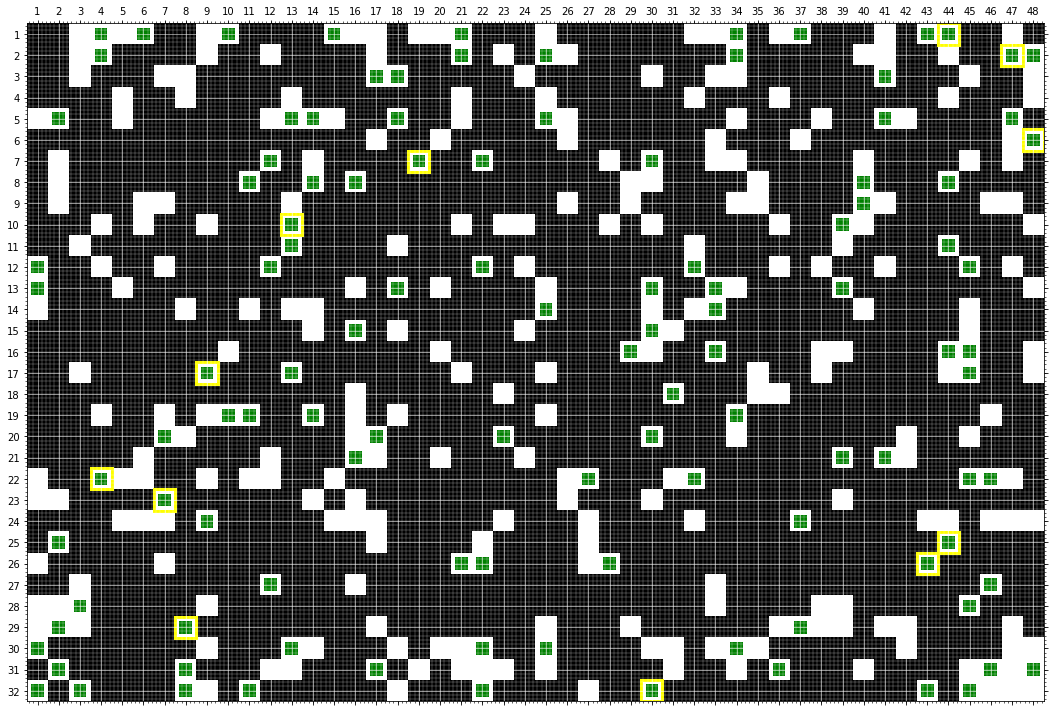

RankGeneFinal_cutoff1Alanine -5.csv
Alanine -5


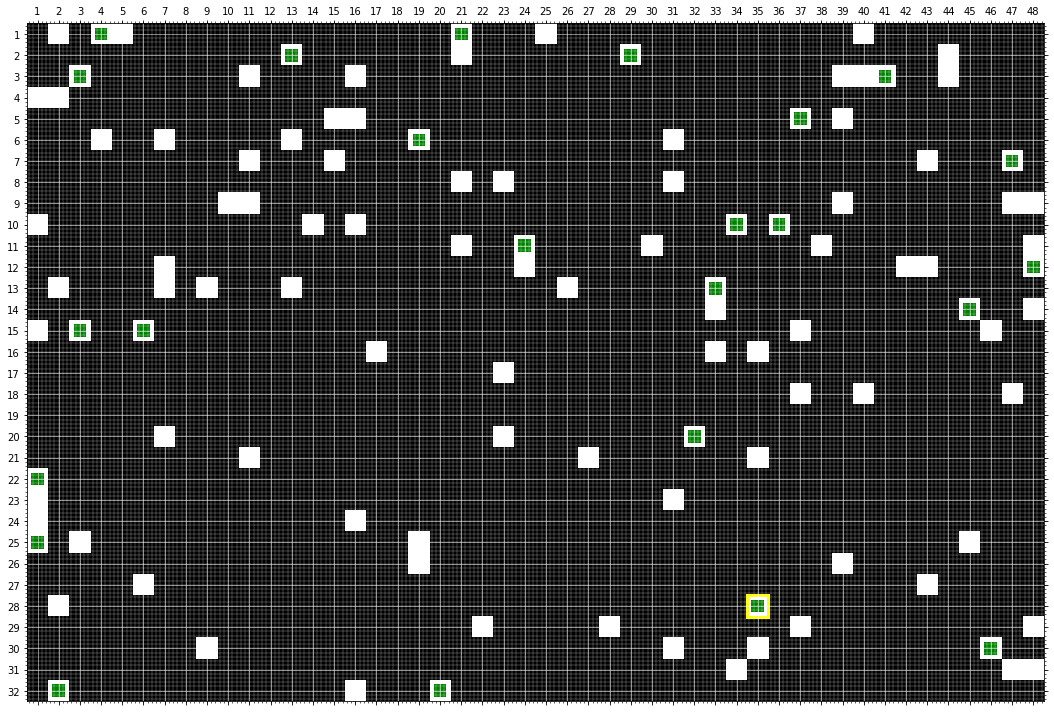

RankGeneFinal_cutoff1Alanine -6.csv
Alanine -6


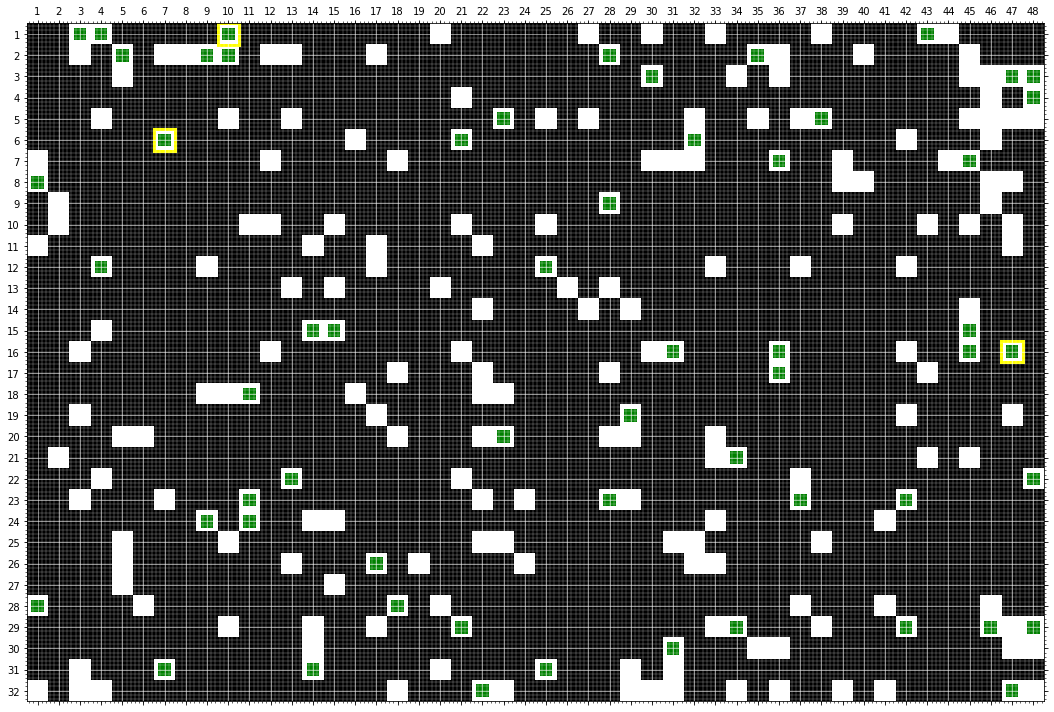

RankGeneFinal_cutoff1Alanine -7.csv
Alanine -7


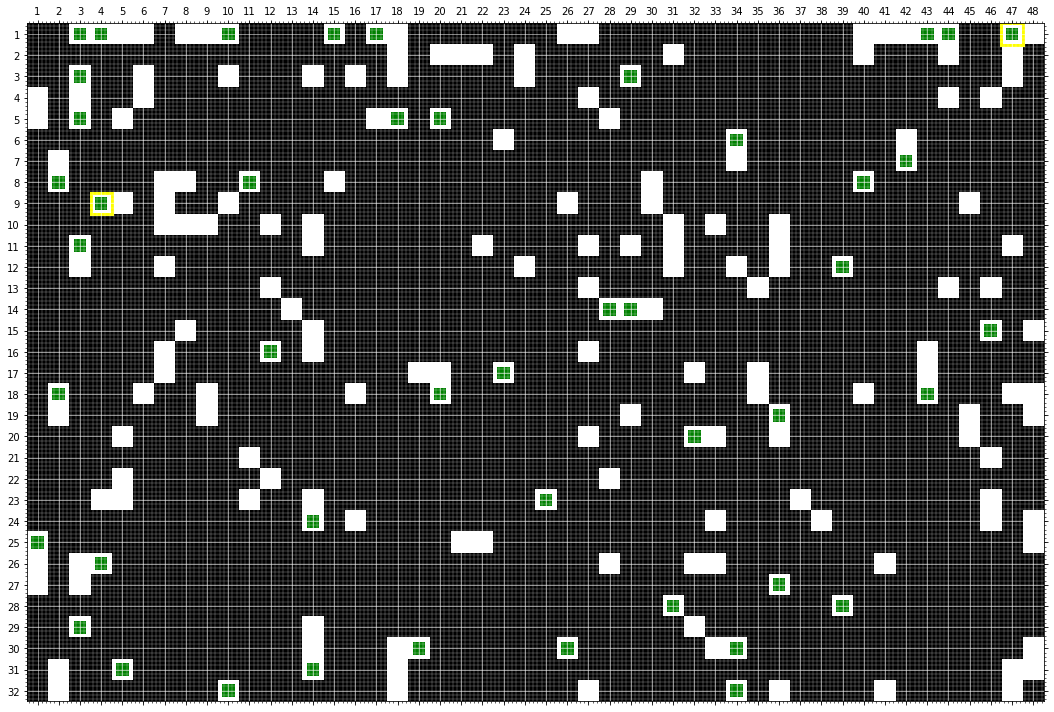

RankGeneFinal_cutoff1Alanine -8.csv
Alanine -8


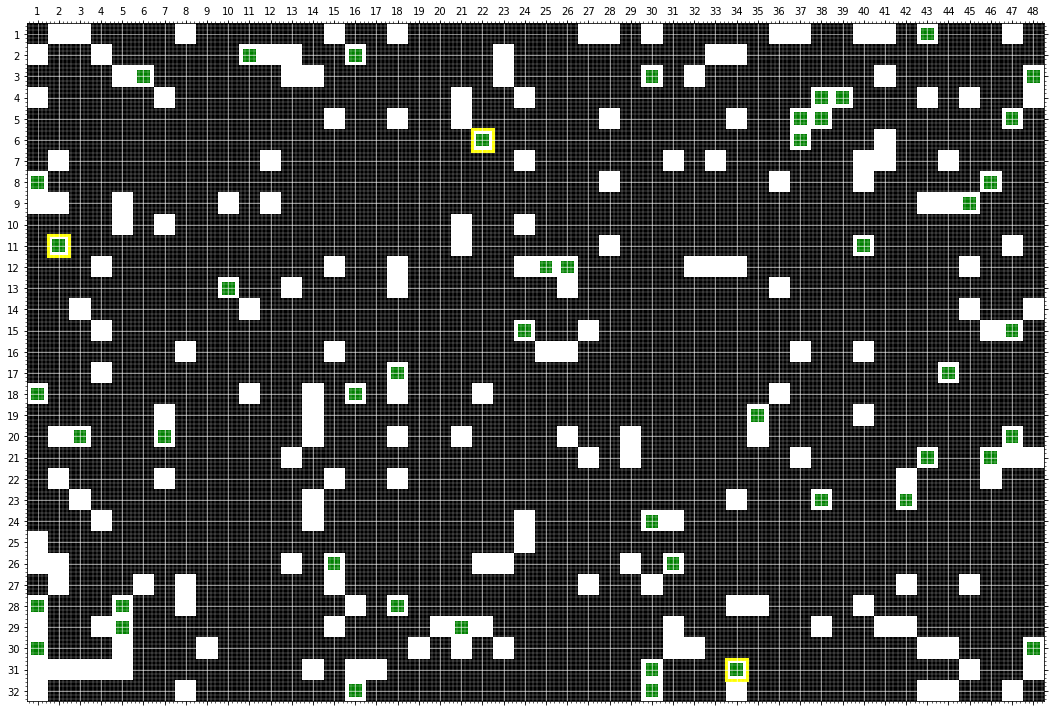

RankGeneFinal_cutoff1Alanine -9.csv
Alanine -9


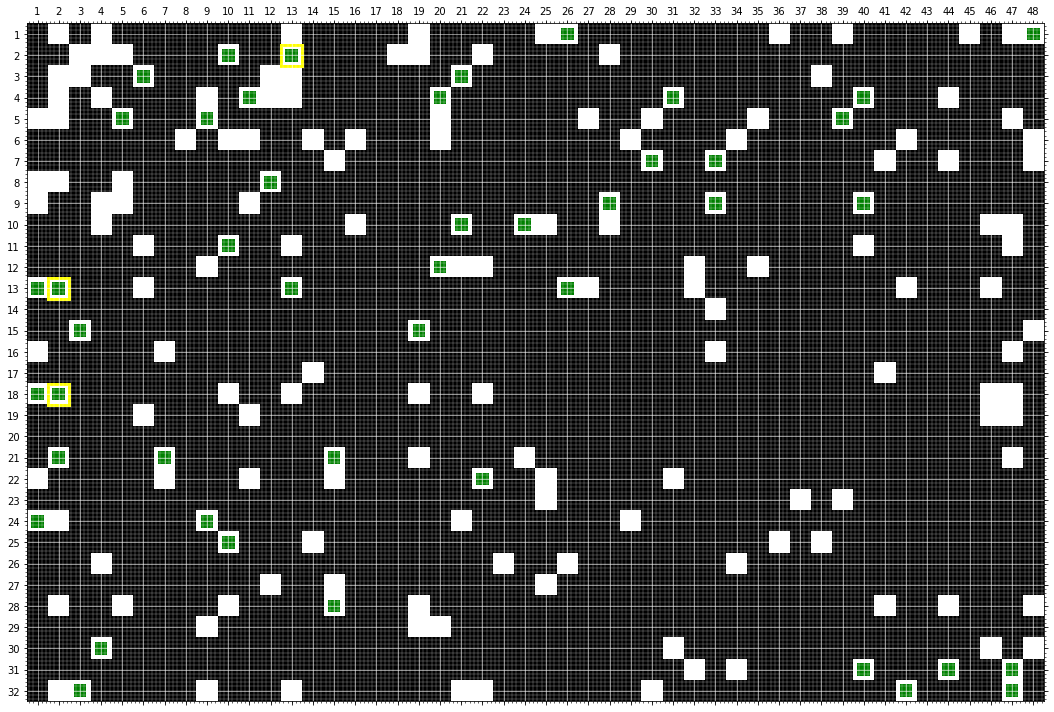

RankGeneFinal_cutoff1Alanine -10.csv
Alanine -10


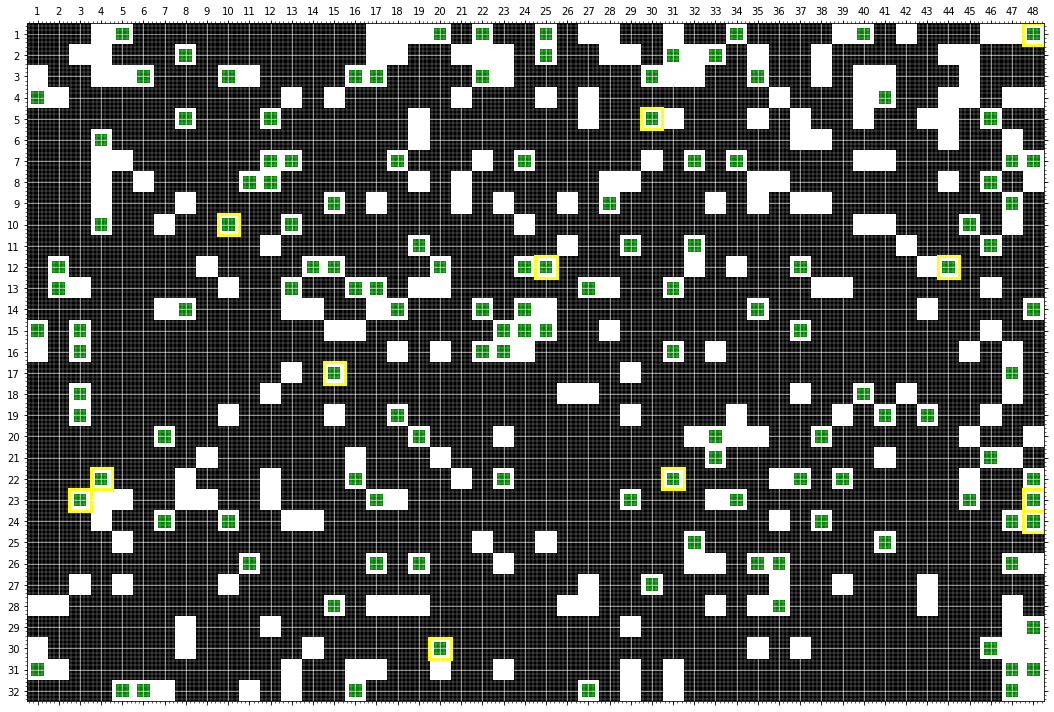

RankGeneFinal_cutoff1Alanine -11.csv
Alanine -11


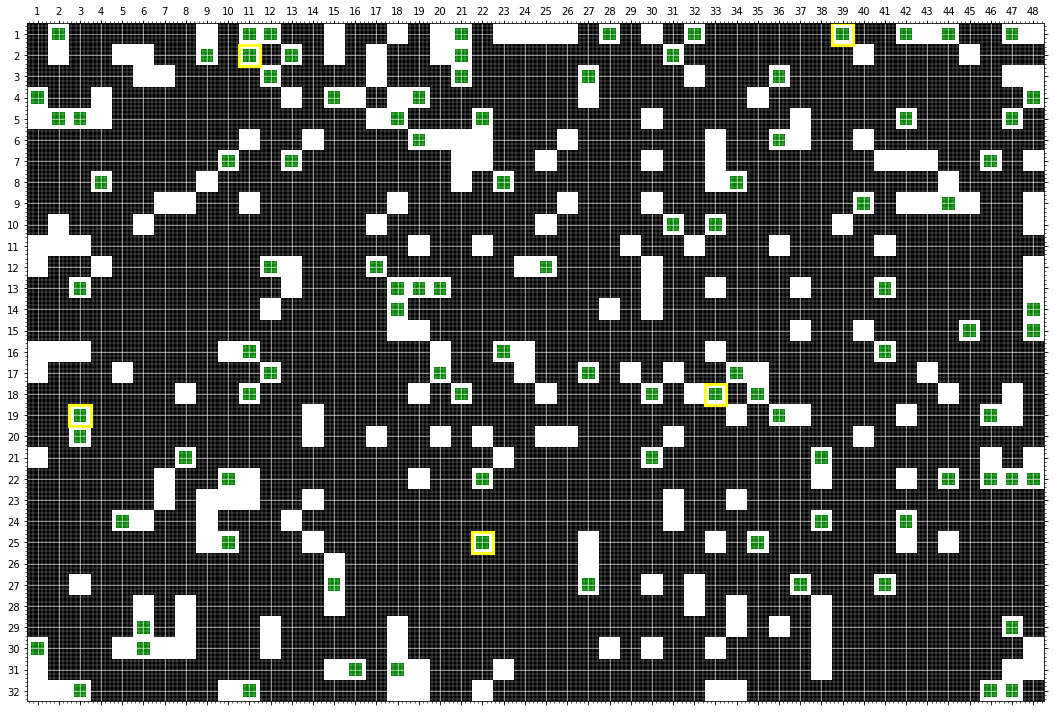

RankGeneFinal_cutoff1Alanine -12.csv
Alanine -12


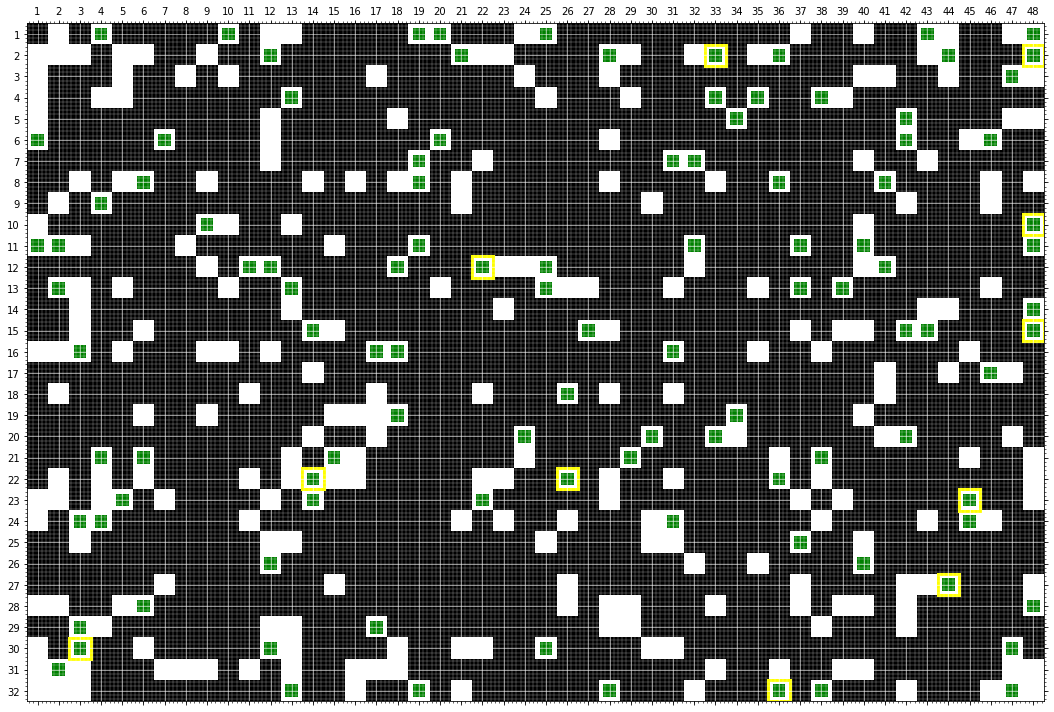

In [47]:
for plateName in PlateList:
    #print(plateName)
    DFBarcodePlate = DFBarcodeDataset_bestmatch[DFBarcodeDataset_bestmatch['Plate']==plateName].reset_index(drop=True) # get DF by plate
    #print(DFBarcodePlate.shape)
    GenePlateDataset = FinalDFGenesDataset[FinalDFGenesDataset['Plate']==plateName].reset_index(drop=True) # Get Gene DF by plate
    #print(GenePlateDataset.shape)
    BCPlatereadList = DFBarcodePlate['read_id'].unique().tolist() # get list of barcode read id
    #print(BCPlatereadList[0])    
    GeneBCMatchedPlate = GenePlateDataset[GenePlateDataset['read_id'].isin(BCPlatereadList)].reset_index(drop=True) # Gene aligned to above barcodes()
    TopGenes = TopRankGene(GeneBCMatchedPlate,1) # added 10/20
    #print(GeneBCMatchedPlate.shape)   
    p = PlateList.index(plateName)
    #print(p)
    #x = SplitDataFrame(DFBarcodePlate,PlateList.index(plateName))
    PlateStructure = GetPlateDataFrame(SplitDataFrame(DFBarcodePlate,PlateList.index(plateName))) # get Barcode df structure
    #print(PlateStructure.shape)            
    PlatePlot = GetPlotDF(PlateStructure) # get barcode df to plot
    #print(PlatePlot.shape)                

Gene9 = pd.read_csv('RankGeneFinal_cutoff1Alanine -9.csv')    PlotHeatMap(PlatePlot,plateName,GeneBCMatchedPlate,DFBarcodePlate,TopGenes)

In [54]:
Gene1 = pd.read_csv('RankGeneFinal_cutoff1Alanine -1.csv')
Gene2 = pd.read_csv('RankGeneFinal_cutoff1Alanine -2.csv')
Gene3 = pd.read_csv('RankGeneFinal_cutoff1Alanine -3.csv')
Gene4 = pd.read_csv('RankGeneFinal_cutoff1Alanine -4.csv')
Gene5 = pd.read_csv('RankGeneFinal_cutoff1Alanine -5.csv')
Gene6 = pd.read_csv('RankGeneFinal_cutoff1Alanine -6.csv')
Gene7 = pd.read_csv('RankGeneFinal_cutoff1Alanine -7.csv')
Gene8 = pd.read_csv('RankGeneFinal_cutoff1Alanine -8.csv')
Gene9 = pd.read_csv('RankGeneFinal_cutoff1Alanine -9.csv')
Gene10 = pd.read_csv('RankGeneFinal_cutoff1Alanine -10.csv')
Gene11 = pd.read_csv('RankGeneFinal_cutoff1Alanine -11.csv')
Gene12 = pd.read_csv('RankGeneFinal_cutoff1Alanine -12.csv')

In [55]:
frame = (Gene1,Gene2,Gene3,Gene4,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,Gene11,Gene12)

In [57]:
clones_to_pick = pd.concat(frame)

In [63]:
clones_to_pick['Plate'].value_counts()
clones_to_pick.head()

,Plate,barcodeNum_REDI,GeneName,headers_GENES,GeneCount,Total,percentage,Rank,Row,Column
0,Alanine -1,745,Gene1359,KU42_L2049A_synonymous_codon_variant_CTC2049GC...,2,2,100.0,1,16,25
1,Alanine -1,433,Gene170,KU42_A948G_synonymous_codon_variant_GCT948GGT_...,2,2,100.0,2,10,1
0,Alanine -2,1346,Gene74,KU42_A1682G_synonymous_codon_variant_GCG1682GG...,3,3,100.0,1,29,2
1,Alanine -2,936,Gene237,KU42_V1068A_synonymous_codon_variant_GTT1068GC...,2,2,100.0,2,20,24
2,Alanine -2,240,Gene139,KU42_R480A_synonymous_codon_variant_CGG480GCT_...,2,2,100.0,3,5,48


In [66]:
clones_to_pick[['Plate','GeneCount']].groupby('Plate',as_index=False).sum()

,Plate,GeneCount
0,Alanine -1,4
1,Alanine -10,30
2,Alanine -11,10
3,Alanine -12,29
4,Alanine -2,15
5,Alanine -3,29
6,Alanine -4,26
7,Alanine -5,2
8,Alanine -6,8
9,Alanine -7,5


In [76]:
PlateList


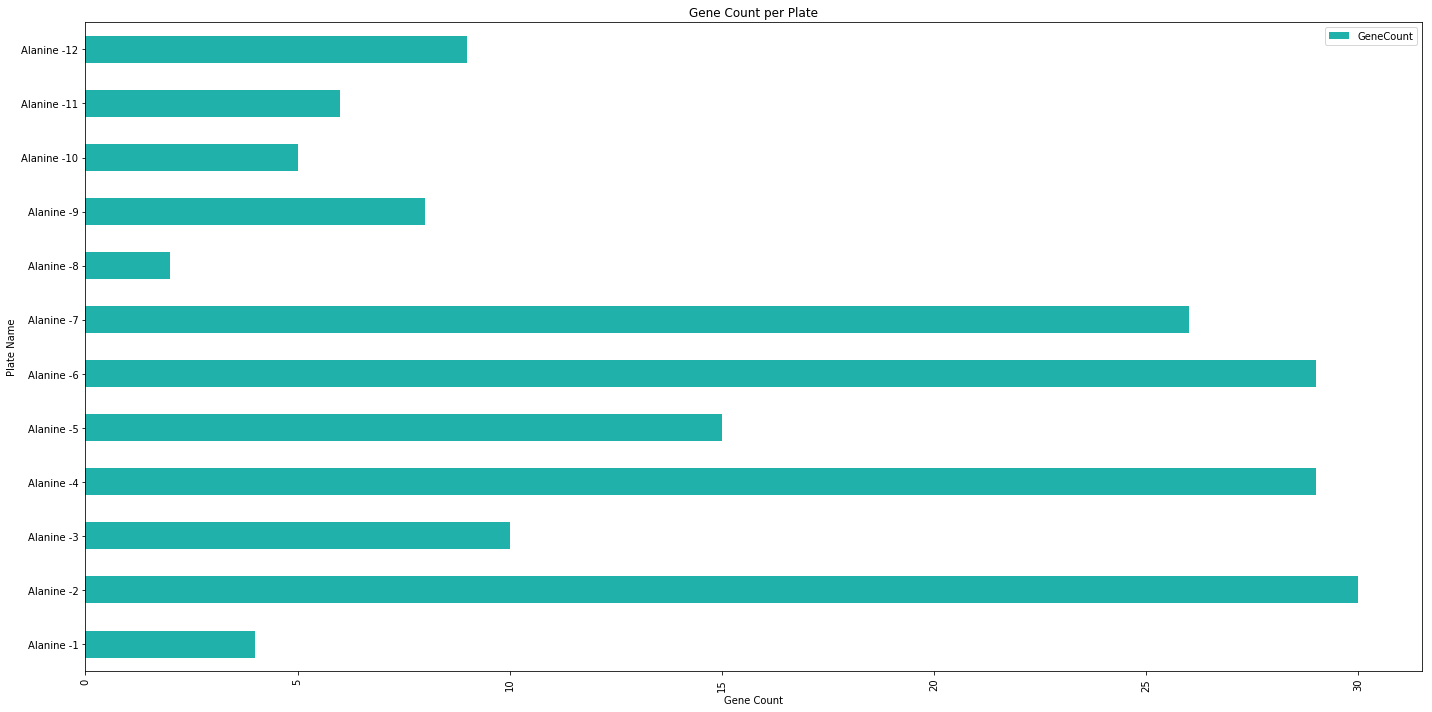

In [93]:
#def PlotPlateMatrics(df,plate):
#df_copy = df[df['Plate']==plate].copy()
df_copy = clones_to_pick[['Plate','GeneCount']].groupby('Plate',as_index=False).sum()
dfPlot = df_copy[['Plate','GeneCount']]
PlatesAll = np.asarray(PlateList)
dfPlot.set_index(PlatesAll,inplace= True) 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig= plt.figure(figsize=(20,10))

ax = fig.add_subplot(111) 

my_colors = ['b', 'r', 'g', 'y', 'k']

#dfPlot.plot.bar(rot=0,ax=ax,color=['red])

dfPlot.plot(kind='barh',color=['lightseagreen', 'mediumPurple', 'plum', 'palevioletred', 'wheat', 'rosybrown','powderblue','slategrey','salmon'],ax=ax)                                   
#df.iloc[5].plot(kind='bar');

plt.xticks(rotation='vertical')
ax.set(Title='Gene Count per Plate' ,xlabel="Gene Count", ylabel="Plate Name")
plt.tight_layout()


fig.savefig('Plate - Gene count', dpi=fig.dpi)
plt.show()

In [62]:
clones_to_pick.to_csv('clones_to_pick.csv',index=False)

In [94]:
DFBarcodeDataset_bestmatch.head()

,AS_FWD,AS_REV,AS_REDI,read_id,Plate,headers_REDI,barcodeNum_REDI,Row,Column,strand_FWD,strand_REV,startpos_FWD
0,0,0,-5,48725,Alanine -5,431,432,9,48,+,-,37
1,0,0,-4,42420,Alanine -10,674,675,15,3,+,-,45
2,0,0,-3,72603,Alanine -2,934,935,20,23,+,-,46
3,0,0,-5,67901,Alanine -2,1186,1187,25,35,+,-,35
4,0,0,-4,84385,Alanine -6,164,165,4,21,+,-,32


In [97]:
FinalDFGenesDataset.head()

,AS_FWD,AS_REV,AS_REDI,AS,read_id,Plate,headers_REDI,barcodeNum_REDI,headers_GENES,GeneName,strand_REV,strand_FWD,strand,Row,Column
0,0,-6,-7,0,36345,Alanine -10,879,880,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,Gene1,+,+,+,19,16
1,0,-6,-6,0,63361,Alanine -6,1014,1015,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,Gene1,+,+,+,22,7
2,0,-6,-7,0,3936,Alanine -6,968,969,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,Gene1,-,+,+,21,9
3,0,0,-7,0,20755,Alanine -10,842,843,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,Gene1,-,+,+,18,27
4,0,0,-6,0,12446,Alanine -10,842,843,KU42_T2197A_synonymous_codon_variant_ACG2197GC...,Gene1,-,+,+,18,27


In [98]:
FinalDFGenesDataset.columns

Index(['AS_FWD', 'AS_REV', 'AS_REDI', 'AS', 'read_id', 'Plate', 'headers_REDI',
       'barcodeNum_REDI', 'headers_GENES', 'GeneName', 'strand_REV',
       'strand_FWD', 'strand', 'Row', 'Column'],
      dtype='object')

In [107]:
GeneMatchedDF = FinalDFGenesDataset[['AS_FWD', 'AS_REV', 'AS_REDI', 'AS', 'read_id', 'Plate', 'headers_REDI',
       'barcodeNum_REDI', 'headers_GENES', 'GeneName','strand_REV',
       'strand_FWD', 'Row', 'Column']]

In [112]:
Dataset = pd.merge(DFBarcodeDataset_bestmatch,GeneMatchedDF,on=['AS_FWD', 'AS_REV', 'AS_REDI','read_id', 'Plate', 'headers_REDI',
       'barcodeNum_REDI','strand_REV','strand_FWD', 'Row', 'Column'],how='left')

In [116]:
Dataset.shape

(6436, 14)

In [117]:
Dataset.head()

,AS_FWD,AS_REV,AS_REDI,read_id,Plate,headers_REDI,barcodeNum_REDI,Row,Column,strand_FWD,strand_REV,startpos_FWD,headers_GENES,GeneName
0,0,0,-5,48725,Alanine -5,431,432,9,48,+,-,37,NaN,NaN
1,0,0,-4,42420,Alanine -10,674,675,15,3,+,-,45,KU42_Y759A_synonymous_codon_variant_TAT759GCT_...,Gene3
2,0,0,-4,42420,Alanine -10,674,675,15,3,+,-,45,KU42_P642A_synonymous_codon_variant_CCT642GCT_...,Gene4
3,0,0,-3,72603,Alanine -2,934,935,20,23,+,-,46,NaN,NaN
4,0,0,-5,67901,Alanine -2,1186,1187,25,35,+,-,35,NaN,NaN


In [115]:
DFBarcodeDataset_Plate4Final.columns

Index(['AS_FWD', 'AS_REV', 'AS_REDI', 'read_id', 'Plate', 'headers_REDI',
       'barcodeNum_REDI', 'Row', 'Column', 'strand_FWD', 'strand_REV',
       'startpos_FWD', 'Positions'],
      dtype='object')

In [133]:
FinalDataset_TPFP = pd.merge(Dataset,DFBarcodeDataset_Plate4Final,on=['AS_FWD', 'AS_REV', 'AS_REDI','read_id', 'Plate', 'headers_REDI',
       'barcodeNum_REDI','strand_FWD','strand_REV', 'Row', 'Column'],how='left')

In [134]:
FinalDataset_TPFP[FinalDataset_TPFP['Positions'].notna()]['Plate'].unique()

array(['Alanine -4'], dtype=object)

In [135]:
FinalDataset_TPFP

,AS_FWD,AS_REV,AS_REDI,read_id,Plate,headers_REDI,barcodeNum_REDI,Row,Column,strand_FWD,strand_REV,startpos_FWD_x,headers_GENES,GeneName,startpos_FWD_y,Positions
0,0,0,-5,48725,Alanine -5,431,432,9,48,+,-,37,NaN,NaN,NaN,NaN
1,0,0,-4,42420,Alanine -10,674,675,15,3,+,-,45,KU42_Y759A_synonymous_codon_variant_TAT759GCT_...,Gene3,NaN,NaN
2,0,0,-4,42420,Alanine -10,674,675,15,3,+,-,45,KU42_P642A_synonymous_codon_variant_CCT642GCT_...,Gene4,NaN,NaN
3,0,0,-3,72603,Alanine -2,934,935,20,23,+,-,46,NaN,NaN,NaN,NaN
4,0,0,-5,67901,Alanine -2,1186,1187,25,35,+,-,35,NaN,NaN,NaN,NaN
5,0,0,-4,84385,Alanine -6,164,165,4,21,+,-,32,NaN,NaN,NaN,NaN
6,0,0,-3,89313,Alanine -10,1338,1339,28,43,+,+,41,NaN,NaN,NaN,NaN
7,0,0,-2,19184,Alanine -10,814,815,17,47,+,-,34,KU42_P453A_synonymous_codon_variant_CCT453GCT_...,Gene11,NaN,NaN
8,0,0,-2,19184,Alanine -10,814,815,17,47,+,-,34,KU42_L1680A_synonymous_codon_variant_CTA1680GC...,Gene12,NaN,NaN
9,0,0,0,19073,Alanine -10,144,145,4,1,+,-,33,NaN,NaN,NaN,NaN


In [130]:
Seqsdf = pd.read_csv('seqsdf.csv').drop('Unnamed: 0',1) 

In [131]:
Seqsdf['read_id']=Seqsdf.index

In [132]:
Seqsdf.head()

,headers,seqs,read_id
0,bcecaf3e-f00d-4d27-8dce-5bf45a07f83f,GGACTCGGTACTTCGTTCGGTGCGTATTGCTCGAATACCGTATGCG...,0
1,20206b7e-8517-495e-bd8e-dce276e41eb2,TTAAAGCTGATTCAGTTACGTGTGCTAAGAACATCTGACGCCGCAT...,1
2,7822dd53-42cf-497f-9759-a905dea2354f,TTCGGTAGTAGCTGGTTCTGGTTACGTATTGCTCGGTGGATTATCT...,2
3,09ecfbd4-868d-4d63-b058-73d554bc9a98,CTAATGCTGACGTCTGGCCTATTGATGTCATTCTCCCCGCGATCGC...,3
4,3f5e79ff-a0ea-4fb5-9272-a69ee28fc8a6,TCGGTATTACTTCGTTCAGTTGCATTGCTCGTTGACGTTGATTTGA...,4


In [136]:
FinalDataset= pd.merge(FinalDataset_TPFP,Seqsdf[['read_id','seqs']],on='read_id',how='inner')

In [140]:
FinalDataset.shape

(6436, 17)

In [139]:
FinalDataset.to_csv('FinalDataset.csv',index=False)